In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Análise de dados dos Filmes e Programas de TV da Netflix.

![](https://pngimg.com/uploads/netflix/netflix_PNG28.png)

> A Netflix é um serviço de transmissão online que oferece uma ampla variedade de séries, filmes e documentários premiados em milhares de aparelhos conectados à internet.

Fonte: https://www.netflix.com/br/


## **Integrantes desse projeto:**

**Julia Del Giudice** - https://www.linkedin.com/in/julia-del-giudice/

**Tatiana Martins**- https://www.linkedin.com/in/tatiims/

## **Objetivo**

Construímos essa análise de dados em conjunto com o intuito de aprender sobre a linguagem Python, bem como, conhecer as bibliotecas para modular, manipular e limpar os dados desse dataset. Dessa forma, trazendo informações e conhecimentos a partir desse conjunto de dados.

## **Obtenção dos Dados**

Os dados foram obtidos a partir do dataset "Netflix Movies and TV Shows".
Este conjunto de dados lista filmes e programas de TV disponíveis na Netflix até meados de 2021

https://www.kaggle.com/datasets/shivamb/netflix-shows?datasetId=434238&select=netflix_titles.csv

In [2]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#Lendo o arquivo:
df_netflix = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

## **Análise dos Dados**
Nesta etapa nós vamos entender mais sobre os dados.

**Dicionário das variavéis**
- show_id: ID’s dos filmes e programas de TV 	
- type: Categoria por filmes ou programas de TV
- title: Nome do títulos
- director: Diretores 	
- cast: Elenco	
- country: País	
- date_added: Data que o filme foi adicionado na Netflix	
- release_year: Ano do lançamento dos títulos 	
- rating: Classificação por idade	
- duration: Duração	
- listed_in: Lista dos tipos de gêneros de filmes e programas de TV	
- description: Sinopse


> Na categoria programas de TV incluem: Séries, documentários, reality show, shows, etc.

In [4]:
#Primeiras 5 linhas do Dataframe:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#Informações sobre o dataframe
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## **Limpeza e Transformação dos Dados**

In [6]:
#Tratando valores nulos:
df_netflix['director'].fillna('Unknown', inplace = True)
df_netflix['cast'].fillna('Unknown', inplace = True)
df_netflix['country'].fillna('Unknown', inplace = True)
#Remove os valores nulos:
df_netflix.dropna(subset=['date_added','rating','duration'], inplace=True)

In [7]:
#Verificando valores duplicados
if any(df_netflix.title.duplicated()) is True:
   print('Existe valores duplicados na coluna "title"')
else:
   print('Não existe valores duplicados na coluna "title"')

Não existe valores duplicados na coluna "title"


In [8]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [9]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Análise Exploratória dos Dados**

**Entre Filmes e Programas de televisão, qual categoria tem o maior número de títulos?**

In [10]:
#Total de filmes e programas de televisão
df_type = df_netflix.type.value_counts().to_frame()
print(df_type)

         type
Movie    6126
TV Show  2664


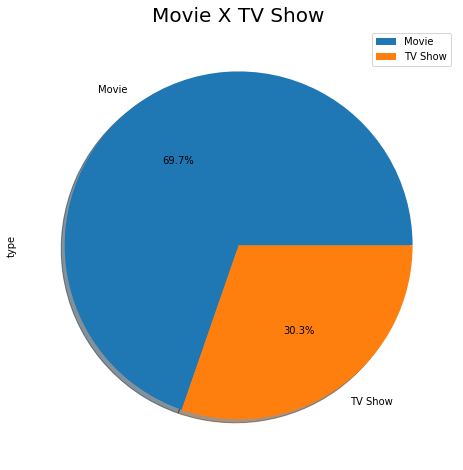

In [11]:
fig1 = df_type.plot.pie(y ='type', autopct = '%0.01f%%', shadow=True, figsize=(10,8))
plt.title('Movie X TV Show', size=20)
plt.show(fig1)

**Entre Filmes e Programas de televisão, qual categoria tem o maior número de títulos por ano?**

In [12]:
df_year = df_netflix.release_year.value_counts().sort_index(ascending = False)
df_movie_year = df_netflix[df_netflix.type == 'Movie'].release_year.value_counts().sort_index(ascending = False).to_frame()
df_tvshow_year = df_netflix[df_netflix.type == 'TV Show'].release_year.value_counts().sort_index(ascending = False).to_frame()
df_movie_year.columns = ['Movies']
df_tvshow_year.columns = ['Tv_Shows']
print(df_year.to_frame(),'\n----------\n',df_movie_year,'\n----------\n',df_tvshow_year)

      release_year
2021           592
2020           953
2019          1030
2018          1146
2017          1030
...            ...
1945             4
1944             3
1943             3
1942             2
1925             1

[74 rows x 1 columns] 
----------
       Movies
2021     277
2020     517
2019     633
2018     767
2017     765
...      ...
1946       1
1945       3
1944       3
1943       3
1942       2

[73 rows x 1 columns] 
----------
       Tv_Shows
2021       315
2020       436
2019       397
2018       379
2017       265
2016       243
2015       159
2014        88
2013        61
2012        63
2011        40
2010        39
2009        34
2008        22
2007        14
2006        14
2005        13
2004         9
2003         8
2002         7
2001         5
2000         4
1999         7
1998         4
1997         4
1996         3
1995         2
1994         2
1993         4
1992         3
1991         1
1990         3
1989         1
1988         2
1986         2
1985

In [13]:
join = df_movie_year.join(df_tvshow_year,how='outer').sort_index(ascending = False)
join.fillna(0, inplace = True)
print(join)

      Movies  Tv_Shows
2021   277.0     315.0
2020   517.0     436.0
2019   633.0     397.0
2018   767.0     379.0
2017   765.0     265.0
...      ...       ...
1945     3.0       1.0
1944     3.0       0.0
1943     3.0       0.0
1942     2.0       0.0
1925     0.0       1.0

[74 rows x 2 columns]


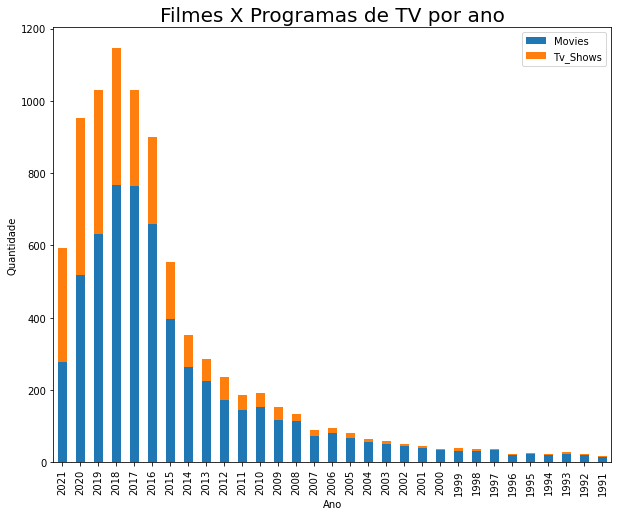

In [14]:
fig2 = join.head(31).plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Filmes X Programas de TV por ano', size=20)
plt.show(fig2)

**Entre Filmes e Programas de televisão, qual categoria tem o maior número de títulos por país?**

In [15]:
df_country = df_netflix.country.value_counts()
df_movie_country = df_netflix[df_netflix.type == 'Movie'].country.value_counts().to_frame()
df_tvshow_country = df_netflix[df_netflix.type == 'TV Show'].country.value_counts().to_frame()
df_movie_country.columns = ['Movies']
df_tvshow_country.columns = ['Tv_Shows']
print(df_country.to_frame(),'\n----------\n',df_movie_country,'\n----------\n',df_tvshow_country)

                                        country
United States                              2809
India                                       972
Unknown                                     829
United Kingdom                              418
Japan                                       243
...                                         ...
Romania, Bulgaria, Hungary                    1
Uruguay, Guatemala                            1
France, Senegal, Belgium                      1
Mexico, United States, Spain, Colombia        1
United Arab Emirates, Jordan                  1

[749 rows x 1 columns] 
----------
                                        Movies
United States                            2055
India                                     893
Unknown                                   439
United Kingdom                            206
Canada                                    122
...                                       ...
United Kingdom, Russia, United States       1
Paraguay, Argentina

**Quais são os Top 10 atores que mais participaram de Filmes?**

In [16]:
top_actors = pd.DataFrame(df_netflix.cast.str.split(',').tolist(), index=df_netflix.type).stack()
top_actors = top_actors.reset_index([0, 'type'])
top_actors.columns = ['type', 'actor']

In [17]:
top_actors.loc[(top_actors["type"]=='Movie') & (top_actors["actor"] != 'Unknown')]["actor"].value_counts().head(10).to_frame()

,actor
Anupam Kher,38
Rupa Bhimani,27
Om Puri,27
Shah Rukh Khan,26
Boman Irani,25
Paresh Rawal,25
Julie Tejwani,24
Akshay Kumar,23
Rajesh Kava,21
Naseeruddin Shah,20


**Quais são os Top 10 atores que mais participaram de Programas de TV?**

In [18]:
top_actors.loc[(top_actors["type"]=='TV Show') & (top_actors["actor"] != 'Unknown')]["actor"].value_counts().head(10).to_frame()

,actor
Takahiro Sakurai,24
Junichi Suwabe,17
Yuki Kaji,17
Ai Kayano,16
Daisuke Ono,14
David Attenborough,14
Yoshimasa Hosoya,13
Takehito Koyasu,13
Yuichi Nakamura,13
Kana Hanazawa,12


**Nuvem de palavras referente a categoria dos títulos**

In [19]:
df_list = pd.DataFrame(df_netflix.listed_in.str.split(',').tolist(), index=df_netflix.type).stack()
df_list = df_list.reset_index([0, 'type'])
df_list.columns = ['type', 'list']

In [20]:
df_list.loc[(df_list["list"] !="unknown")]["list"].value_counts().head(20) 


 International Movies       2624
Dramas                      1599
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
International TV Shows       773
 Independent Movies          736
 TV Dramas                   695
 Romantic Movies             613
Children & Family Movies     605
 International TV Shows      576
 Thrillers                   512
 Comedies                    464
 TV Comedies                 454
Crime TV Shows               399
Kids' TV                     385
 Music & Musicals            357
 Romantic TV Shows           338
Stand-Up Comedy              334
Name: list, dtype: int64

In [21]:
df_list_in = df_list.loc[(df_list["list"] !="unknown")]["list"]
print(df_list_in)

0                   Documentaries
1          International TV Shows
2                       TV Dramas
3                    TV Mysteries
4                  Crime TV Shows
                   ...           
19289    Children & Family Movies
19290                    Comedies
19291                      Dramas
19292        International Movies
19293            Music & Musicals
Name: list, Length: 19294, dtype: object


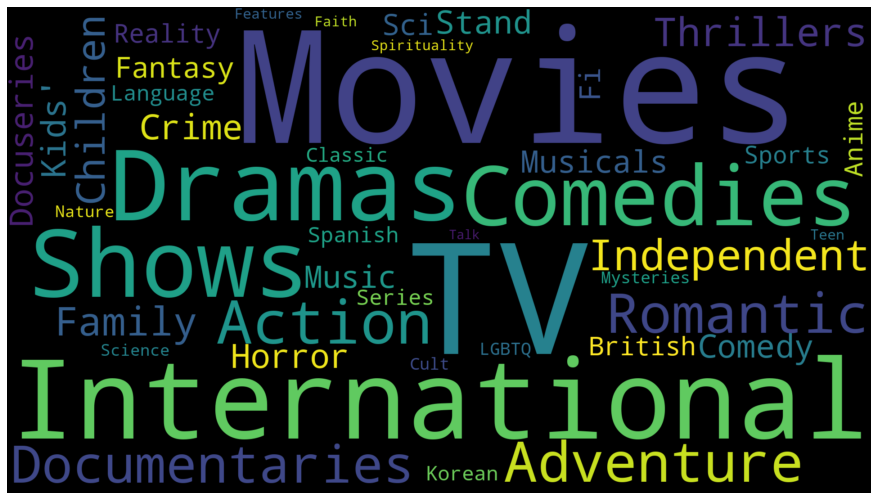

In [22]:
wordcloud = WordCloud(max_font_size=350, collocations=False,width=1920, height=1080, background_color="black").generate(' '.join(df_list_in))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Conclusão**

Ao fazer a análise desse conjunto de dados  compreendemos que na categoria programas de TV incluem: Séries, documentários, reality show, shows, etc.
Até meados de 2021 o catálogo da Netflix era composto por mais filmes do que programas de TV. No ano de 2015 os programas de TV tiveram um aumento significativo e os Estados Unidos é o país que lidera os lançamentos tanto por filmes e programas de TV, mas apesar dessa liderança do país os atores que mais aparecem são do continente asiático.